In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # Import the imputer

In [12]:
# Cargar el conjunto de datos
ruta_archivo = 'data_evaluacion.csv'  # Actualiza esta ruta según sea necesario
data = pd.read_csv(ruta_archivo)

# Renombrar columnas para facilitar el acceso (opcional)
data.columns = ['edad', 'sector_trabajo', 'fnlwgt', 'educacion', 'num_educacion', 'estado_civil',
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia_capital', 'perdida_capital',
                'horas_por_semana', 'pais_nativo', 'ingreso']


In [13]:
# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Dividir los datos en características y variable objetivo
X = data.drop('ingreso', axis=1)
y = data['ingreso']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Scale the imputed data



In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:

# Inicializar y entrenar el clasificador de red neuronal
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Train Accuracy: 0.8652487714987716
Accuracy: 0.8483

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7464
           1       0.71      0.61      0.65      2305

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



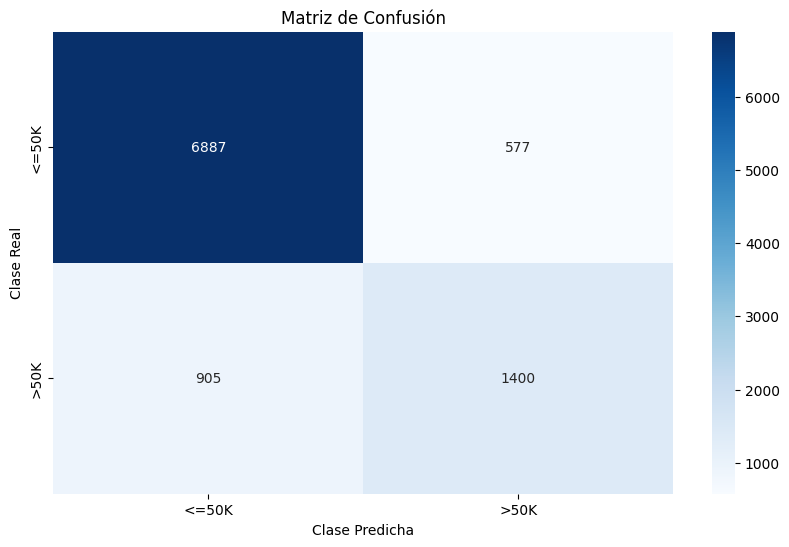

In [17]:

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print(f"Accuracy: {accuracy:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["<=50K", ">50K"], columns=["<=50K", ">50K"])

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

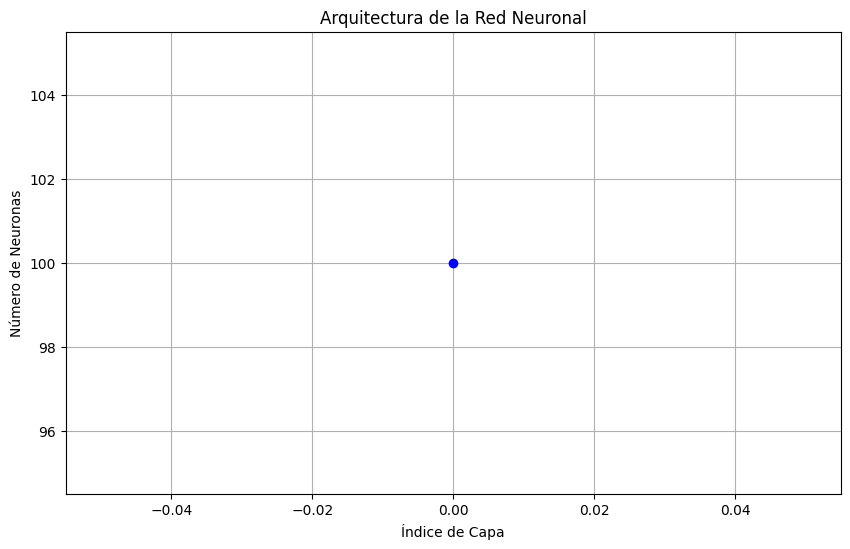

In [18]:
# Visualizar la arquitectura de la red neuronal
import matplotlib.pyplot as plt

# Se utiliza una función auxiliar para visualizar la arquitectura de la red
def plot_nn_architecture(model):
    layers = model.hidden_layer_sizes
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(len(layers)), [layer for layer in layers], 'bo-')
    ax.set_xlabel('Índice de Capa')
    ax.set_ylabel('Número de Neuronas')
    ax.set_title('Arquitectura de la Red Neuronal')
    plt.grid()
    plt.show()

plot_nn_architecture(model)

## Conclusiones
Podemos ver que el modelo de red neuronal se acerca mucho a la presición que arrojan los otros modelos que es del 85%, lo cual indica que es un modelo bueno pero que puede mejorar si se le ajusta de mejor forma, las neuronas o las capas.

Tambien vemos que en la matriz de confusión en la diagonal principal un buen acierto del modelo, a comparación de los anteriores modelos, vemos que no hay una cantidad grande de falsos negativos, porque se mantiene debajo de 1000.

En el reporte de clasificación vemos que hay una mejor presición para la clase 0 (0.88) frente a la clase 1 (0.71)

Aqui el modelo no se encuentra ni en un overfitting o underfitting por la diferencia entre test y train que es aproximadamente de 2%.